# Korelacja i regresja - zadanie

Zbiór danych **cars.csv** zawiera wyniki pewnych testów drogowych samochodów.
Zmienne:
- mpg: Liczba mil, jakie samochód może przejechać na jednym galonie paliwa. Oznacza "Miles Per Gallon" (mile na galon).
- cylinders: Liczba cylindrów w silniku.
- displacement: Pojemność skokowa silnika, mierzona w calach sześciennych (cu.in.).
- horsepower: Moc silnika, wyrażona w koniach mechanicznych.
- weight: Waga samochodu, podana w setkach funtów (1000 lbs).
- acceleration: Przyśpieszenie pojazdu.
- model: Rok pojazdu.
- origin: Pochodzenie pojazdu - reprezentuje kod kraju.
- car: Nazwa samochodu.



## Wczytywanie danych
Wczytaj jako ramka danych plik "cars2.csv", a nastepnie:
- wyświetl kilka pierwszych wierszy
- wyświetl strukturę ramki danych
- wyświetl rozmiar ramki danych


In [ ]:
#biblioteki
install.packages("corrplot")
library(corrplot)
install.packages("Metrics")
library(Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#wczytanie danych
data <- read.csv('cars.csv',stringsAsFactors = TRUE)

#kilka pierwszych wierszy
head(data)

#struktura ramki
print("Struktura ramki:")
str(data)

#rozmiar ramki
print("Rozmiar ramki:")
print(dim(data))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,33.0,4,91,32,1795,17.4,76,3,honda civic
2,20.0,6,225,2,3651,17.7,76,1,dodge aspen se
3,18.0,6,250,50,3574,21.0,76,1,ford granada ghia
4,18.5,6,250,7,3645,16.2,76,1,pontiac ventura sj
5,17.5,6,258,62,3193,17.8,76,1,amc pacer d/l
6,29.5,4,97,44,1825,12.2,76,2,volkswagen rabbit


[1] "Struktura ramki:"
'data.frame':	200 obs. of  9 variables:
 $ mpg         : num  33 20 18 18.5 17.5 29.5 32 28 26.5 20 ...
 $ cylinders   : int  4 6 6 6 6 4 4 4 4 4 ...
 $ displacement: int  91 225 250 250 258 97 85 97 140 130 ...
 $ horsepower  : int  32 2 50 7 62 44 43 47 45 3 ...
 $ weight      : int  1795 3651 3574 3645 3193 1825 1990 2155 2565 3150 ...
 $ acceleration: num  17.4 17.7 21 16.2 17.8 12.2 17 16.4 13.6 15.7 ...
 $ model       : int  76 76 76 76 76 76 76 76 76 76 ...
 $ origin      : int  3 1 1 1 1 2 3 3 1 2 ...
 $ car         : Factor w/ 179 levels "amc concord",..: 94 56 81 145 5 167 49 154 88 172 ...
[1] "Rozmiar ramki:"
[1] 200   9


Sprawdź, czy wystepują braki. Wyświetl ich sumę. Jeśli wystepują uzupełnij
 je np. medianą. Sprawdź rezultat.


In [ ]:
# liczba brakujących danych w zbiorze danych
x = sum(is.na(data))
print(paste("Liczba braków przed uzupełnieniem: ", x))


#obliczenie mediany
y = cars_median=median(data$horsepower,na.rm=TRUE)
print(paste("Mediana: ", y))

#uzupełnianie braków medianą
data$horsepower[is.na(data$horsepower)]=median(data$horsepower,na.rm=TRUE)

#ponowne sprawdzenie braków
x = sum(is.na(data))
print(paste("Liczba braków po uzupełnieniu: ", x))


[1] "Liczba braków przed uzupełnieniem:  4"
[1] "Mediana:  40"
[1] "Liczba braków po uzupełnieniu:  0"


Wybierz do analizy tylko zmienne numeryczne.

In [ ]:
#Wybranie zmiennych numerycznych
num_cols <- sapply(data,is.numeric)
num_cols

#Tabela zawierająca tylko zmienne numeryczne
cor_data <- cor(data[,num_cols])
cor_data

mpg    cylinders displacement   horsepower       weight acceleration 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
       model       origin          car 
        TRUE         TRUE        FALSE

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
mpg,1.0000000,-0.7206425,-0.7773678,0.35124490,-0.8498579,0.2585013,0.5041184,0.50125909
cylinders,-0.7206425,1.0000000,0.9393381,-0.49330101,0.8565786,-0.2676516,-0.3583230,-0.45107627
displacement,-0.7773678,0.9393381,1.0000000,-0.39747655,0.9224963,-0.2752393,-0.3386787,-0.56276366
horsepower,0.3512449,-0.4933010,-0.3974765,1.00000000,-0.4052634,0.2090755,0.2634229,0.08464419
weight,-0.8498579,0.8565786,0.9224963,-0.40526343,1.0000000,-0.1316865,-0.3502066,-0.54323084
acceleration,0.2585013,-0.2676516,-0.2752393,0.20907551,-0.1316865,1.0000000,0.1523402,0.10390974
model,0.5041184,-0.3583230,-0.3386787,0.26342290,-0.3502066,0.1523402,1.0000000,0.11219251
origin,0.5012591,-0.4510763,-0.5627637,0.08464419,-0.5432308,0.1039097,0.1121925,1.00000000


## Korelacja

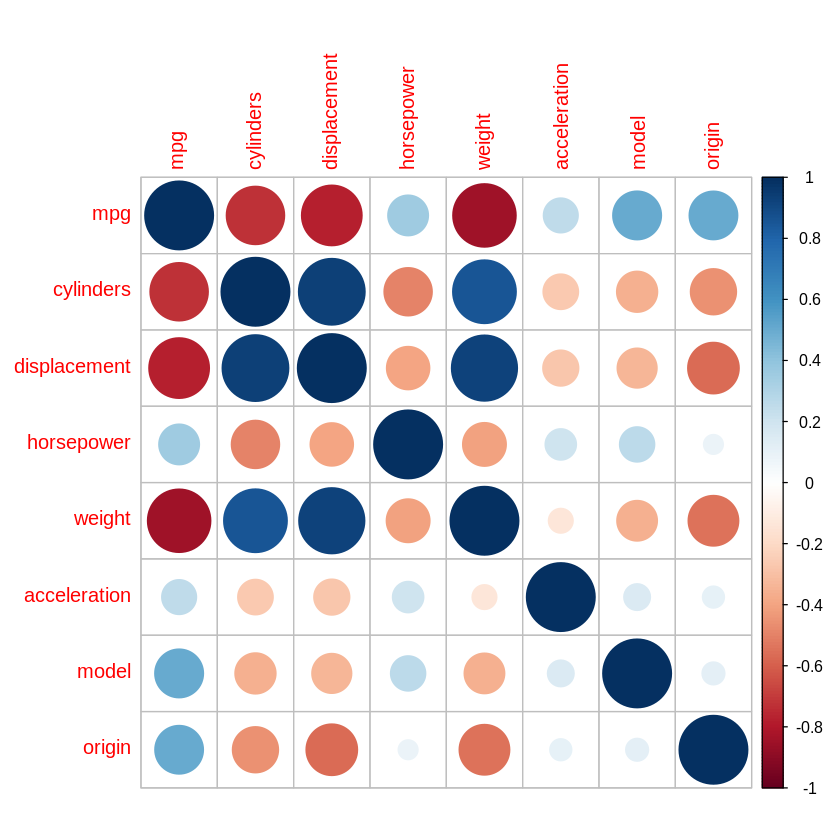

In [ ]:
#macierz korelacji
corrplot(cor_data)

Dla zmiennej mpg korelacja jest:
- praktycznie pełna ujmena ze zmienną weight
- bardzo wysoko ujemna ze zmienną displacement
- wysoko ujemna ze zmienna cylinders
- słaba dodatnia ze zmienną acceleration
- niska dodatnia ze zmienną horsepower
- umiarkowana dodatnia ze zmiennymi model i origin


## Regresja

1. Zbuduj modele regrsji:
- liniowej prostej
- oraz wielorakiej (peny model i regresja krokowa wsteczna lub regresja krokowa postępująca)
2. Wykonaj predykcję dla każdego modelu.
3. Oceń, który model daje najlepsze wyniki

#Regresja liniowa prosta

In [ ]:
#model regresji liniowej prostej
regresja_1 <- lm(mpg~weight,data=data[,num_cols])

summary(regresja_1)


Call:
lm(formula = mpg ~ weight, data = data[, num_cols])

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5441 -2.8516 -0.5529  2.2792 13.1128 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 53.5090303  1.1918829   44.90   <2e-16 ***
weight      -0.0094890  0.0004182  -22.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.089 on 198 degrees of freedom
Multiple R-squared:  0.7223,	Adjusted R-squared:  0.7209 
F-statistic: 514.9 on 1 and 198 DF,  p-value: < 2.2e-16


In [ ]:
#predykcja dla regresji_1
data = data[, num_cols]
prediction_1 <- predict(regresja_1,data)
results <- cbind(prediction_1,data$mpg)
colnames(results) <- c('pred','real')
head(results)
results <- as.data.frame(results)

,pred,real
1,36.47620,33.0
2,18.86454,20.0
3,19.59520,18.0
4,18.92148,18.5
5,23.21052,17.5
6,36.19153,29.5


In [ ]:
#metryki oceny jakości modelu dla regresja_1
mae(results$real, results$pred)
mse(results$real, results$pred)
rmse(results$real, results$pred)



[1] 3.145239

[1] 16.5514

[1] 4.068341

In [ ]:
summary(regresja_1)$adj.r.squared

[1] 0.7208558

#Regresja wieloraka

Pełny model

In [ ]:
#model regresji wielorakiej
regresja_2 =lm(mpg~.,data=data[,num_cols])
summary(regresja_2)


Call:
lm(formula = mpg ~ ., data = data[, num_cols])

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0571 -2.4118 -0.2807  1.9171 11.5424 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -30.87607   11.90833  -2.593   0.0103 *  
cylinders     -0.02239    0.54728  -0.041   0.9674    
displacement   0.02642    0.01351   1.956   0.0520 .  
horsepower    -0.01436    0.01603  -0.896   0.3716    
weight        -0.01078    0.00102 -10.567  < 2e-16 ***
acceleration   0.52051    0.11097   4.690 5.17e-06 ***
model          0.94085    0.14220   6.616 3.58e-10 ***
origin         0.82118    0.36525   2.248   0.0257 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.52 on 192 degrees of freedom
Multiple R-squared:  0.8004,	Adjusted R-squared:  0.7931 
F-statistic:   110 on 7 and 192 DF,  p-value: < 2.2e-16


In [ ]:
#predykcja dla regresji_2
data = data[, num_cols]
prediction <- predict(regresja_2,data)
results<- cbind(prediction,data$mpg)
colnames(results) <- c('pred','real')
results <- as.data.frame(results)
head(results)

,pred,real
,<dbl>,<dbl>
1,34.64882,33.0
2,17.07572,20.0
3,19.59520,18.0
4,16.94843,18.5
5,22.07701,17.5
6,30.78374,29.5


In [ ]:
#metryki oceny jakości modelu dla regresja_2
mae(results$real, results$pred)
mse(results$real, results$pred)
rmse(results$real, results$pred)

[1] 0.2457392

[1] 0.5950797

[1] 0.7714141

In [ ]:
summary(regresja_2)$adj.r.squared

[1] 0.8675223

Model regresji wielorakiej krokowej postępującej

In [ ]:
#regresja wieloraka krokowa postępująca
regresja_3 <- lm(mpg~1,data[,num_cols])

In [ ]:
model <- step(regresja_3, scope = list(upper = regresja_2,
                lower = regresja_3), direction="forward")

Start:  AIC=819.51
mpg ~ 1

               Df Sum of Sq     RSS    AIC
+ weight        1    8608.3  3310.3 565.29
+ displacement  1    7202.4  4716.2 636.09
+ cylinders     1    6189.6  5729.0 674.99
+ model         1    3028.9  8889.6 762.86
+ origin        1    2994.7  8923.9 763.63
+ horsepower    1    1470.4 10448.1 795.17
+ acceleration  1     796.4 11122.1 807.68
<none>                      11918.6 819.51

Step:  AIC=565.29
mpg ~ weight

               Df Sum of Sq    RSS    AIC
+ model         1    579.24 2731.0 528.82
+ acceleration  1    260.62 3049.7 550.89
<none>                      3310.3 565.29
+ origin        1     26.50 3283.8 565.69
+ displacement  1      3.51 3306.8 567.08
+ cylinders     1      2.40 3307.9 567.15
+ horsepower    1      0.66 3309.6 567.25

Step:  AIC=528.82
mpg ~ weight + model

               Df Sum of Sq    RSS    AIC
+ acceleration  1   181.681 2549.4 517.06
+ origin        1    57.365 2673.7 526.58
<none>                      2731.0 528.82
+ cylin

In [ ]:
summary(model)


Call:
lm(formula = mpg ~ weight + model + acceleration + displacement + 
    origin, data = data[, num_cols])

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6066 -2.5737 -0.2665  1.9965 11.6025 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.066e+01  1.166e+01  -2.630  0.00921 ** 
weight       -1.063e-02  9.963e-04 -10.670  < 2e-16 ***
model         9.269e-01  1.406e-01   6.594 3.95e-10 ***
acceleration  5.052e-01  1.092e-01   4.627 6.79e-06 ***
displacement  2.627e-02  8.717e-03   3.014  0.00292 ** 
origin        8.782e-01  3.504e-01   2.506  0.01303 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.51 on 194 degrees of freedom
Multiple R-squared:  0.7995,	Adjusted R-squared:  0.7943 
F-statistic: 154.7 on 5 and 194 DF,  p-value: < 2.2e-16


In [ ]:
#predykcja dla regresji_3
# Przewidywanie wartości mpg
prediction <- predict(model, newdata = data[, num_cols])

# Ramka danych z przewidywanymi i rzeczywistymi wartościami
results <- data.frame(pred = prediction, real = data$mpg)
head(results)

,pred,real
,<dbl>,<dbl>
1,34.51716,33.0
2,16.70221,20.0
3,19.84485,18.0
4,16.66491,18.5
5,22.48853,17.5
6,30.85046,29.5


In [ ]:
#metryki oceny jakości modelu dla regresji_3
mae(results$real, results$pred)
mse(results$real, results$pred)
rmse(results$real, results$pred)


[1] 2.691183

[1] 11.94944

[1] 3.456797

#Ocena jakości modelów

Interpretacja regresji:
- Regresja liniowa: zakłada liniową zależność między zmienną objaśnianą a jedną zmienną objaśniającą. Ograniczenie to sprawia, że regresja liniowa może być stosowana tylko w przypadku, gdy zależność między zmiennymi jest liniowa.

- Regresja wieloraka: uwzględnia wszystkie dostępne zmienne objaśniające jednocześnie. Model regresji wielorakiej jest w stanie uwzględnić wszystkie możliwe interakcje między zmiennymi oraz ich nieliniowe zależności. Może to prowadzić do jeszcze dokładniejszych predykcji niż w przypadku regresji wielorakiej krokowej.

- Regresja wieloraka krokowa:  umożliwia uwzględnienie wielu zmiennych objaśniających jednocześnie. Algorytm regresji wielorakiej krokowej iteracyjnie wybiera najlepsze zmienne objaśniające  W porównaniu do regresji liniowej, regresja wieloraka krokowa może uwzględniać większą liczbę zmiennych i uwzględniać bardziej złożone wzorce w danych


Interpretacja metryk oceny jakości modeli (skrótowa):

-im niższa wartość **rmse** tym model jest lepszy

-im niższa wartość **mae** tym lepiej dopasowany model do danych

-im niższa wartość **mse** tym lepszy model

Porównywanie modeli:

Do porównania modeli wykorzystano obliczone predykcje dla każdego z modeli oraz metryki oceny jakości modeli. Zestawienie tych danych wykazało, że najlepsze wyniki daje model regresji wielorakiej.

Gdyby zestawić w hierarchi testowane modele otrzymano by następującą kolejność:
1. model regresji wielorakiej

2. model regresji wielorakiej krokowej postępującej

3. model regresji liniowej
